# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [2]:
!pip install palmerpenguins

In [45]:
# data set

import pandas as pd
from palmerpenguins import load_penguins
from plotnine import *
import numpy as np
import sklearn as sklearn
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures, FunctionTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# Code Here
penguins = load_penguins()
penguins = penguins.dropna()
penguins.head()

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [10]:
# Best Linear Model using all the variables
# Define Variables

# Use 3 variables to predict bill_depth so just drop bill_depth
X = penguins.drop(['bill_depth_mm'], axis = 1) # still a two-dimensional object

# y is just bill_depth
y = penguins['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X,y)

# Best Linear pipeline
ct = ColumnTransformer(
  [("standardize",
    StandardScaler(),['flipper_length_mm','body_mass_g'])
  ],
  remainder = "drop").set_output(transform="pandas")


lr_pipeline = Pipeline(
  [("preprocessing", ct),
  ("linear_regression", LinearRegression())]
).set_output(transform="pandas")

In [11]:
# Fit Linear Model
fitted_linear = lr_pipeline.fit(X_train,y_train)

# Predictions for test and training data
y_linear_test = fitted_linear.predict(X_test)
y_linear_train = fitted_linear.predict(X_train)

# mean squared score for training and test predictions
lmtest = mean_squared_error(y_test, y_linear_test)
lmtrain = mean_squared_error(y_train,y_linear_train)

In [12]:
# kNN Model and Pipeline - K value of 10

ct2 = ColumnTransformer(
  [("dummify",
    OneHotEncoder(sparse_output = False,handle_unknown='ignore'), # take it out and run it to see error
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough")


knn_pipeline = Pipeline(
  [("preprocessing", ct2),
  ("kNN", KNeighborsRegressor(n_neighbors = 10))]
).set_output(transform="pandas")



In [13]:
# Fit KNN Model
fitted_knn = knn_pipeline.fit(X_train,y_train)

# Predictions for test and training data
y_knn_test = fitted_knn.predict(X_test)
y_knn_train = fitted_knn.predict(X_train)

# mean squared score for training and test predictions
kmtest = mean_squared_error(y_test, y_knn_test)
kmtrain = mean_squared_error(y_train,y_knn_train)

In [14]:
# # kNN Model and Pipeline 2 - K value of 50

ct3 = ColumnTransformer(
  [("dummify",
    OneHotEncoder(sparse_output = False,handle_unknown='ignore'), # take it out and run it to see error
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough")


knn_pipeline_2 = Pipeline(
  [("preprocessing", ct3),
  ("kNN", KNeighborsRegressor(50))]
).set_output(transform="pandas")



In [15]:
# Fit KNN2 Model
fitted_knn2 = knn_pipeline_2.fit(X_train,y_train)

# Predictions for test and training data
y_knn_test2 = fitted_knn2.predict(X_test)
y_knn_train2 = fitted_knn2.predict(X_train)

# mean squared score for training and test predictions
kmtest2 = mean_squared_error(y_test, y_knn_test2)
kmtrain2 = mean_squared_error(y_train,y_knn_train2)

In [17]:
# Decision Tree Model and Pipeline

ct4 = ColumnTransformer(
  [("dummify",
    OneHotEncoder(sparse_output = False,handle_unknown='ignore'), # take it out and run it to see error
    make_column_selector(dtype_include=object)),
    ("standardize",
    StandardScaler(),
    make_column_selector(dtype_include=np.number))
  ],
  remainder = "passthrough")


dt_pipeline = Pipeline(
  [("preprocessing", ct4),
  ("decision_tree", DecisionTreeRegressor())]
).set_output(transform="pandas")



In [18]:
# Fit Decision Tree Model
fitted_dt = dt_pipeline.fit(X_train,y_train)

# Predictions for test and training data
y_dt_test = fitted_dt.predict(X_test)
y_dt_train = fitted_dt.predict(X_train)

# mean squared score for training and test predictions
dttest = mean_squared_error(y_test, y_dt_test)
dttrain = mean_squared_error(y_train, y_dt_train)

In [21]:
# Dataframe of all the Models and MSE values

test_error = {'model':['linear','knn10','knn50','decisiontree'], '#_of_predictors':[2,7,7,7],
              'MSE_test':[lmtest,kmtest,kmtest2,dttest],
              'MSE_train': [lmtrain,kmtrain,kmtrain2,dttrain]}
r2 = pd.DataFrame(test_error)
r2

,model,#_of_predictors,MSE_test,MSE_train
0,linear,2,2.352339,2.633004
1,knn10,7,0.669619,0.530323
2,knn50,7,0.891737,0.833651
3,decisiontree,7,0.835357,0.000000


/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sure the column mapped to the x aesthetic has the right dtype.
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_smooth.py:210: PlotnineWarning: Smoothing requires 2 or more points. Got 1. Not enough points for smoothing. If this message a surprise, make sur

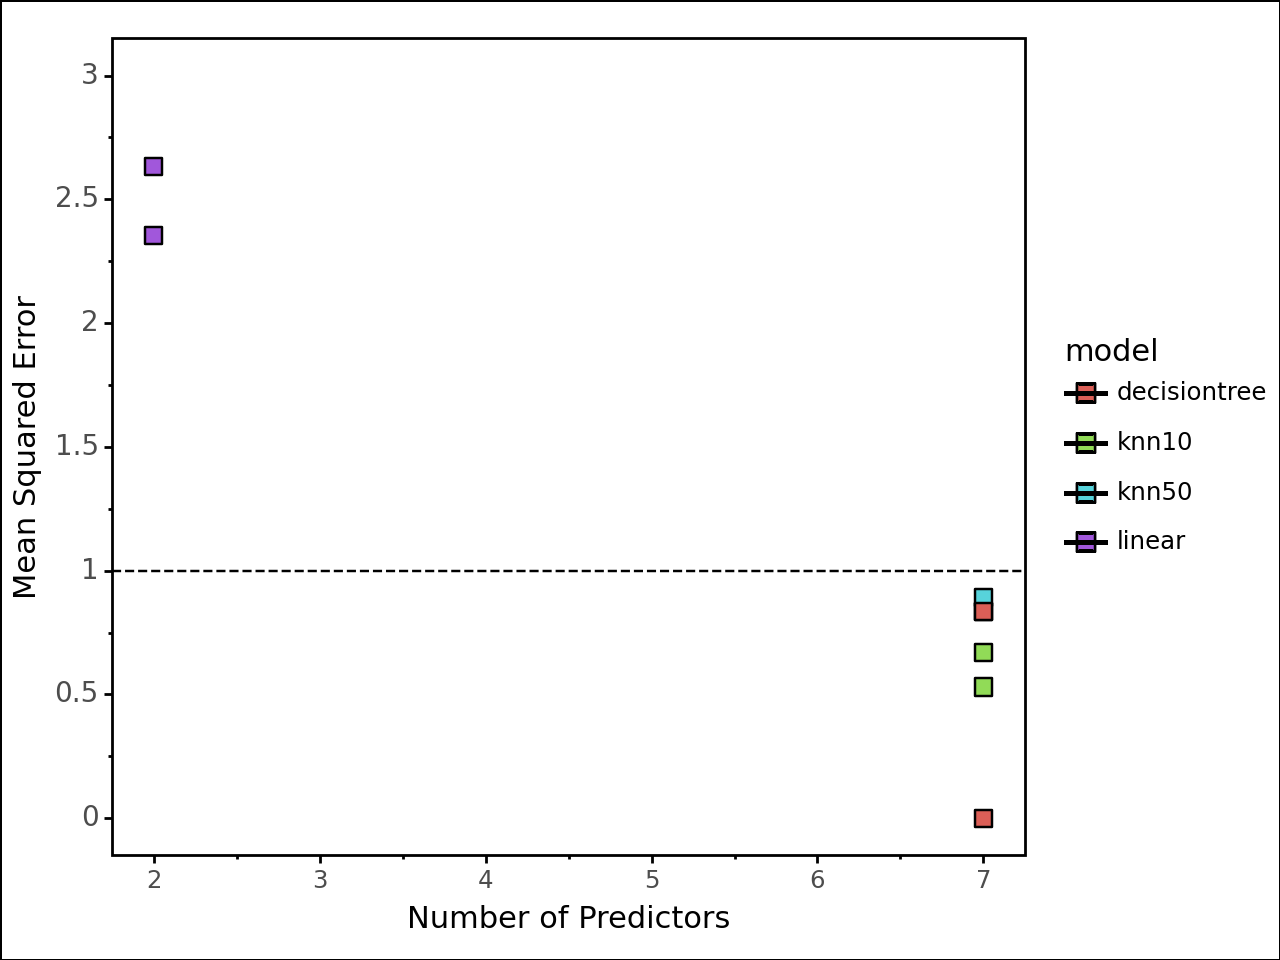

<Figure Size: (640 x 480)>

In [61]:
(ggplot(r2, aes(x = '#_of_predictors', y = 'MSE_test', fill = 'model'))
+ geom_point(aes(y = 'MSE_train'), shape = 's', size = 3)
+ geom_point(aes(y = 'MSE_test'), shape = 's', size = 3) # shape = 's' changes points to squares
+ geom_smooth(aes(x='#_of_predictors', y='MSE_test', group='model'), method='lm', se=False)
+ theme_minimal() # takes away the grey background
+ theme(
        panel_grid=element_blank(),# takes away all the lines
        plot_background=element_rect(fill="white"), # makes background white
        panel_border=element_rect(color="black", size=1), # adds border
        axis_title_y=element_text(text="Mean Squared Error"),
        axis_title_x=element_text(text='Number of Predictors'), # Y-axis title
        axis_text_y=element_text(size=10),  # Adjust Y-axis text size
        axis_ticks=element_line(color="black", size=0.2)  # Y-axis tick color,  # Y-axis tick length
        )
+ scale_y_continuous(limits=(0, 3), breaks=[0, 0.5, 1, 1.5, 2, 2.5, 3])  # Set Y-axis range and breaks
    + geom_hline(yintercept=1, linetype='dashed', color='black')  # Add a dashed line at y = 1
)

Decision tree has the best MSE. It has a wide variance between the test data and the training data compared to the other models.

The k values I used were 10 and 50. The knn model with the k value of 10 had lower MSE and the knn model with a k value of 50 had a similar MSE for both training and test.

Therefore I think the KNN50 would be the best fit model because it predicted similar MSE's.


I didn't specify the alpha value therefore the training data MSE is 0 because it is perfectly trained on my data.